In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_csv('takehome_users.csv', encoding='latin-1')
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
df1['object_id'].nunique()

12000

Change the name of the column `object_id` to `user_id`.

In [5]:
df1.rename(columns={'object_id':'user_id'}, inplace=True)
df1.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
df1['creation_time']=pd.to_datetime(df1['creation_time'])
df1['last_session_creation_time']=pd.to_datetime(df1['last_session_creation_time'], unit='s')
df1['months']=df1['last_session_creation_time']-df1['creation_time']
df1['months']=round(df1['months']/np.timedelta64(1,'M'))

In [7]:
df1.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,months
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,4.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


In [8]:
mean_months_since_creation_time=df1['months'].mean()
mean_months_since_creation_time

1.928142355207979

In [9]:
df2=pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [11]:
df2['visited'].unique()

array([1])

In [12]:
df2['user_id'].nunique()

8823

Notice that the column `visited` in df2 is entered 1 for each record. To simplify the process, we get rid of this column.

In [13]:
df3=df2.drop(columns=['visited'])
df3.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [14]:
df3['time_stamp']=pd.to_datetime(df3['time_stamp'])

In [15]:
df4=df3.merge(df3, how='left', on='user_id')
df4.head()

,time_stamp_x,user_id,time_stamp_y
0,2014-04-22 03:53:30,1,2014-04-22 03:53:30
1,2013-11-15 03:45:04,2,2013-11-15 03:45:04
2,2013-11-15 03:45:04,2,2013-11-29 03:45:04
3,2013-11-15 03:45:04,2,2013-12-09 03:45:04
4,2013-11-15 03:45:04,2,2013-12-25 03:45:04


In [16]:
df4['days']=df4['time_stamp_y']-df4['time_stamp_x']
df4['days']=df4['days']/np.timedelta64(1,'D')
df4.head()

,time_stamp_x,user_id,time_stamp_y,days
0,2014-04-22 03:53:30,1,2014-04-22 03:53:30,0.0
1,2013-11-15 03:45:04,2,2013-11-15 03:45:04,0.0
2,2013-11-15 03:45:04,2,2013-11-29 03:45:04,14.0
3,2013-11-15 03:45:04,2,2013-12-09 03:45:04,24.0
4,2013-11-15 03:45:04,2,2013-12-25 03:45:04,40.0


In [17]:
df5=df4[(df4['days']<8)&(df4['days']>0)]
df5.head()

,time_stamp_x,user_id,time_stamp_y,days
47,2013-12-25 03:45:04,2,2013-12-31 03:45:04,6.0
92,2014-02-03 03:45:04,2,2014-02-08 03:45:04,5.0
93,2014-02-03 03:45:04,2,2014-02-09 03:45:04,6.0
107,2014-02-08 03:45:04,2,2014-02-09 03:45:04,1.0
108,2014-02-08 03:45:04,2,2014-02-13 03:45:04,5.0


In [18]:
df6=df5.groupby(['user_id'])['time_stamp_x'].value_counts()
df7=df6[df6>1].to_frame()
df7.head()


time_stamp_x
user_id time_stamp_x                     
2       2014-02-03 03:45:04             2
        2014-02-08 03:45:04             2
        2014-02-09 03:45:04             2
10      2014-01-22 22:08:03             7
        2014-01-23 22:08:03             7

In [19]:
df7.rename(columns={'time_stamp_x': 'count'}, inplace=True)
df7.head()

count
user_id time_stamp_x              
2       2014-02-03 03:45:04      2
        2014-02-08 03:45:04      2
        2014-02-09 03:45:04      2
10      2014-01-22 22:08:03      7
        2014-01-23 22:08:03      7

In [20]:
df7.reset_index(inplace=True)

In [21]:
df7['user_id'].unique()

array([    2,    10,    20, ..., 11969, 11975, 11988])

In [22]:
df7['user_id'].nunique()

1656

In [23]:
df=df1[df1['user_id'].isin(df7['user_id'].unique())]
df.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,months
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,4.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,17.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,2014-05-29 11:46:38,0,0,58,NaN,3.0
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,2014-05-31 06:29:09,0,0,401,79.0,3.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,2014-05-25 19:05:07,1,0,235,NaN,18.0


In [24]:
df['creation_source'].value_counts()

ORG_INVITE            574
GUEST_INVITE          369
SIGNUP                302
SIGNUP_GOOGLE_AUTH    239
PERSONAL_PROJECTS     172
Name: creation_source, dtype: int64

In [25]:
df_=df['creation_source'].value_counts().to_frame().reset_index()
df_.rename(columns={'index': 'creation_source', 'creation_source': 'count'}, inplace=True)
total_count=df_['count'].sum()
df_['creation_source_percent']=round(100*df_['count']/total_count, 1)
df_

,creation_source,count,creation_source_percent
0,ORG_INVITE,574,34.7
1,GUEST_INVITE,369,22.3
2,SIGNUP,302,18.2
3,SIGNUP_GOOGLE_AUTH,239,14.4
4,PERSONAL_PROJECTS,172,10.4


In [26]:
df['enabled_for_marketing_drip'].value_counts()

0    1399
1     257
Name: enabled_for_marketing_drip, dtype: int64

In [27]:
df['opted_in_to_mailing_list'].value_counts()

0    1227
1     429
Name: opted_in_to_mailing_list, dtype: int64

Text(0.5, 1.0, 'Count of Each Creation Source')

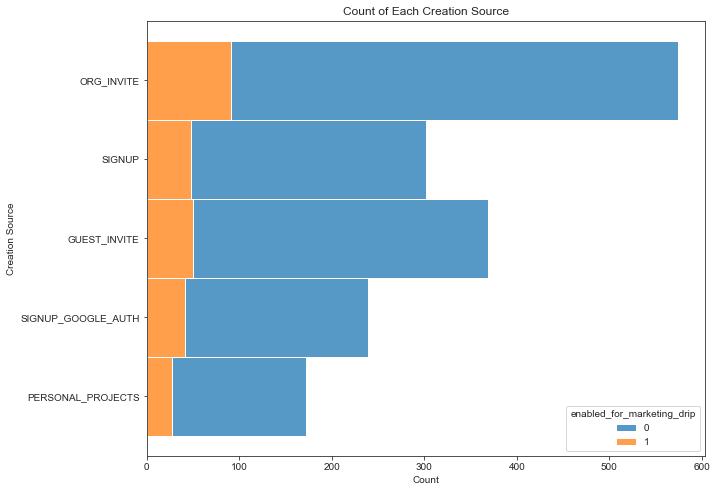

In [37]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 8.0)
ax = sns.histplot(y="creation_source", hue="enabled_for_marketing_drip", data=df, multiple='stack')
plt.xlabel('Count')
plt.ylabel('Creation Source')
plt.title('Count of Each Creation Source')

Text(0.5, 1.0, 'Count of Each Creation Source')

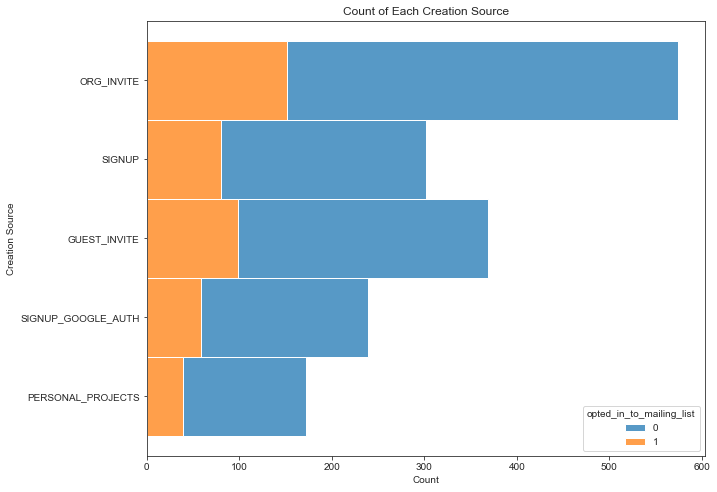

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10.0, 8.0)
ax = sns.histplot(y="creation_source", hue="opted_in_to_mailing_list", data=df, multiple='stack')
plt.xlabel('Count')
plt.ylabel('Creation Source')
plt.title('Count of Each Creation Source')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 1 to 11987
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     1656 non-null   int64         
 1   creation_time               1656 non-null   datetime64[ns]
 2   name                        1656 non-null   object        
 3   email                       1656 non-null   object        
 4   creation_source             1656 non-null   object        
 5   last_session_creation_time  1656 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    1656 non-null   int64         
 7   enabled_for_marketing_drip  1656 non-null   int64         
 8   org_id                      1656 non-null   int64         
 9   invited_by_user_id          943 non-null    float64       
 10  months                      1656 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
m

In [30]:
mean_adopted=df['months'].mean()
mean_adopted

9.618357487922705

In [32]:
df['org_id'].nunique()

401

<AxesSubplot:>

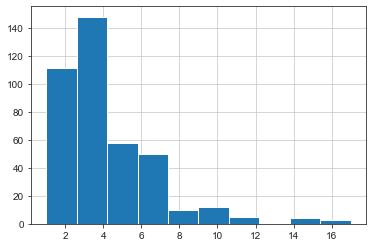

In [31]:
df['org_id'].value_counts().hist()